In [2]:
import os
import geopandas.datasets
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as geopd
import sklearn.cluster as clustering
import numpy as np
os.chdir("/Volumes/ExtraHDD2/DS_Assignments_Data/ADM_2")

In [ ]:
posts = pd.read_csv("instagram_posts.csv", delimiter="\t", parse_dates=[5], infer_datetime_format = True)

19    0.05877
18    0.05856
20    0.05788
21    0.05690
17    0.05584
16    0.05309
14    0.05196
15    0.05125
22    0.04984
13    0.04702
23    0.04265
12    0.04223
11    0.03897
0     0.03603
10    0.03519
1     0.03302
9     0.03219
3     0.03175
2     0.03159
8     0.02962
4     0.02938
7     0.02589
5     0.02577
6     0.02461
Name: cts, dtype: float64


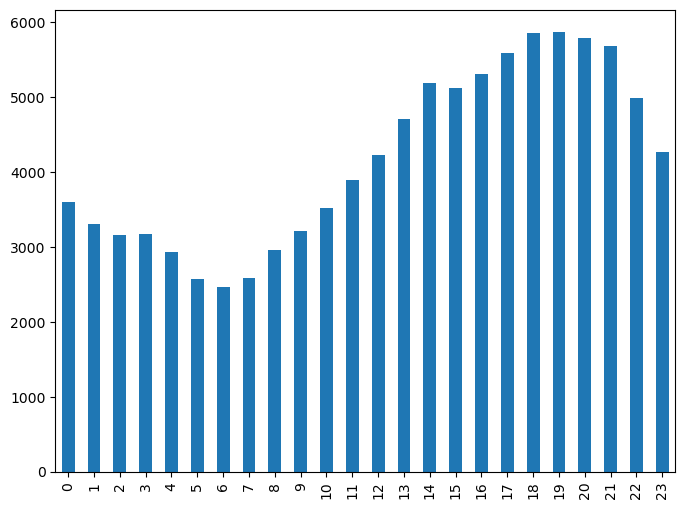

In [13]:
# RQ2 [H1]

# Most common time in which users publish their posts [H2]

# This is pretty straightforward to do
# It should be stressed that we have no information from the dataset for what concerns the timezones, which is a quite crucial bit of info
# The timestamps probably refer to a single timezone, so it is difficult to talk about the "most common time", since to check
# something like this we should have the timestamps relatively to the timezone of the account which posted.
# Considering the limitation, let's answer the question
print((posts.cts.dt.hour.value_counts(True)*100).astype("str").add("%"))
plt.figure(figsize=(8, 6))
posts.cts.dt.hour.value_counts().sort_index().plot.bar()
plt.show()

# The time range which seems more active is the one from early-mid afternoon to 9/10 PM.